<a href="https://colab.research.google.com/github/s1ms2l8/analise-base-imdb/blob/main/an%C3%A1lise_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

---


## Análise de dados para criação de um artigo


### **Tema:** <font size='4.dp'> Avaliações de Filmes no Imdb


### **Objetivos:**
  *   Identificar dualidade de notas em filmes block busters
  *   Comparar gêneros com uma média de avaliação mais alta e mais baixa
  *   Validar globalização da cultura através da língua original do filme

### **Base de dados:** [IMDB movies dataset](https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset)






# Importando os Dados

---



In [2]:
import numpy as np  #Biblioteca responsável por operações matemáticas
import pandas as pd # Biblioteca responsável pela manipulação de dados
import matplotlib.pyplot as plt # Biblioteca responsável pela visualização de dados
import seaborn as sns # Biblioteca de visualização de dados em alto nível


In [3]:
df = pd.read_excel('/content/drive/MyDrive/imdb_movies.xlsx') #Leitura dos dados para um dataframe (df)

In [4]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-02-03 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-05-04 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-05-01 00:00:00,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


#Limpeza e transformação

---



In [6]:
df.duplicated().sum()

0

<Axes: >

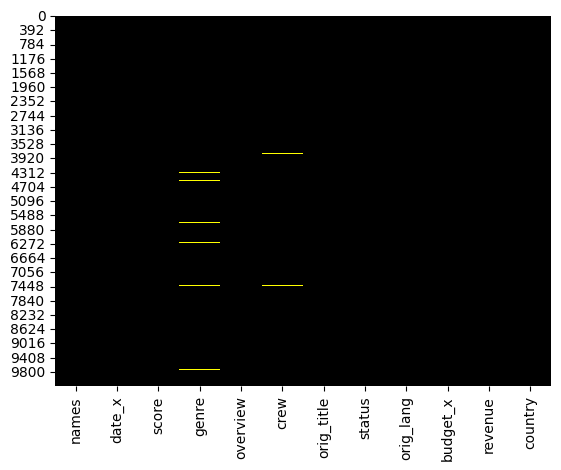

In [7]:
sns.heatmap(df.isnull(),
            cbar = False,
            cmap = 'gnuplot')

In [8]:
nanMovies = []
for row in range(0, len(df['genre'])):
  if (df['genre'].isnull()[row] or df['crew'].isnull()[row]):
    nanMovies.append(df['names'][row])

In [9]:
print(len(nanMovies))

126


In [10]:
i=0

for row in range(0, len(df)):
  if (df['genre'].isnull()[row]):
    i += 1

print (i)

85


> 126 filmes sem gênero ou Cast de atuação, representa 1,24% da base de dados

---



In [11]:
df.rename(columns={'names':'nome', 'date_x':'lançamento', 'genre':'genero', 'overview':'sinopse', 'crew':'elenco', 'orig_title':'titulo_orig', 'orig_lang':'idioma_orig', 'budget_x':'orçamento', 'revenue':'bilheteria', 'country':'pais_orig'}, inplace = True)

In [12]:
df['status'].unique()

array(['Released', 'Post Production', 'In Production'], dtype=object)

In [13]:
for row in range(0, len(df)):
  if (df['status'][row] != 'Released' or df['genero'].isnull()[row] or df['elenco'].isnull()[row]):
    #dropa todo filme não lançado, sem gêneros ou elenco
    df.drop(row, inplace = True)

In [14]:
df['status'].unique()

array(['Released'], dtype=object)

In [15]:
df.drop(columns=['status'], inplace = True)

Removidos registros com status diferente de lançado devido não ser possível avaliar o desempenho de um filme que não foi lançado,

após isso coluna já não servia mais um propósito e também foi deletada

In [16]:
newIndex = []

for row in range(0, len(df)):
  newIndex.append(row)

df.reindex(newIndex)

,nome,lançamento,score,genero,sinopse,elenco,titulo_orig,idioma_orig,orçamento,bilheteria,pais_orig
0,Creed III,2023-02-03 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-05-04 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,English,100000000.0,7.244590e+08,AU
3,Mummies,2023-05-01 00:00:00,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...
10002,Joe Dirt,2001-10-08 00:00:00,56.0,"Mystery, Adventure, Comedy, Romance, Drama","Joe Dirt is a janitor with a mullet hairdo, ac...","David Spade, Joe Dirt, Brittany Daniel, Brandy...",Joe Dirt,English,16000000.0,3.098770e+07,AU
10003,Domme,03/17/2023,55.0,Drama,A man spies on his neighbors because of the no...,"Ava Mendez, , Ali Asistio, , Mark Anthony Fern...",Domme,Tagalog,142000000.0,4.544886e+08,PH
10004,Excision,2012-02-11 00:00:00,62.0,"Drama, Horror",Alienated teen Pauline struggles with the pres...,"AnnaLynne McCord, Pauline, Traci Lords, Phylli...",Excision,English,112000000.0,2.818232e+08,US
10005,The Boat That Rocked,2009-09-04 00:00:00,73.0,"Drama, Comedy","An ensemble comedy, where the romance is betwe...","Tom Sturridge, Carl, Philip Seymour Hoffman, T...",The Boat That Rocked,English,50000000.0,3.747265e+07,AU


In [40]:
df['lançamento'] = pd.to_datetime(df['lançamento'])




---

#PRÉ-PROCESSAMENTO

---



In [17]:
generos = []

for row in range(0, len(df)):
  generos.append(str(df['genero'].iloc[row]).split(u',\xa0'))

df['genero'] = generos

In [39]:
df['genero'].head()

0                                    [Drama, Action]
1               [Science Fiction, Adventure, Action]
2    [Animation, Adventure, Family, Fantasy, Comedy]
3    [Animation, Comedy, Family, Adventure, Fantasy]
4                                           [Action]
Name: genero, dtype: object

In [25]:
generos = []

for i in range(0, len(df)):
  for j in range(0, len(df['genero'].iloc[i])):
    if df['genero'].iloc[i][j] not in generos:
      generos.append(df['genero'].iloc[i][j])

print(generos) #reutilizando variavel para listar todos os gêneros

['Drama', 'Action', 'Science Fiction', 'Adventure', 'Animation', 'Family', 'Fantasy', 'Comedy', 'Thriller', 'Crime', 'Horror', 'Mystery', 'History', 'War', 'Documentary', 'Romance', 'Music', 'Western', 'TV Movie']


In [26]:
filme_genero = {}

for key in generos:
    filmes = []
    for value in range(0, len(df)):
        if key in df['genero'].iloc[value]:
          filmes.append(value)

    filme_genero[key] = filmes

print(filme_genero)

{'Drama': [0, 9, 15, 22, 33, 41, 43, 44, 46, 50, 53, 58, 61, 62, 63, 64, 65, 69, 70, 79, 85, 88, 93, 97, 98, 100, 109, 110, 114, 115, 123, 125, 126, 127, 131, 136, 137, 138, 143, 147, 156, 166, 177, 181, 188, 190, 192, 193, 197, 202, 204, 207, 210, 211, 214, 215, 217, 218, 221, 222, 229, 231, 233, 234, 235, 241, 243, 255, 262, 264, 267, 268, 271, 273, 276, 279, 288, 299, 300, 302, 314, 316, 320, 321, 323, 328, 338, 343, 353, 357, 366, 368, 384, 385, 397, 401, 405, 406, 407, 412, 413, 415, 416, 417, 418, 420, 423, 425, 436, 437, 438, 440, 441, 442, 443, 445, 453, 454, 462, 463, 479, 480, 481, 490, 493, 496, 497, 500, 510, 513, 528, 529, 531, 534, 535, 537, 539, 540, 543, 545, 549, 554, 558, 561, 569, 571, 572, 573, 576, 581, 582, 589, 591, 592, 593, 594, 597, 603, 605, 606, 608, 610, 611, 612, 613, 617, 620, 621, 625, 639, 650, 651, 655, 656, 657, 660, 667, 674, 682, 687, 695, 700, 713, 714, 717, 719, 725, 730, 739, 743, 751, 755, 757, 758, 759, 760, 761, 763, 768, 772, 773, 775, 776, 7

In [38]:
print(
    df.iloc[filme_genero['Animation'][0]]
)

nome                                 The Super Mario Bros. Movie
lançamento                                   2023-05-04 00:00:00
score                                                       76.0
genero           [Animation, Adventure, Family, Fantasy, Comedy]
sinopse        While working underground to fix a water main,...
elenco         Chris Pratt, Mario (voice), Anya Taylor-Joy, P...
titulo_orig                          The Super Mario Bros. Movie
idioma_orig                                              English
orçamento                                            100000000.0
bilheteria                                           724459031.0
pais_orig                                                     AU
Name: 2, dtype: object


##gêneros tratados, normalizando notas em 3 categorias

In [50]:
desempenho_nota = []

for nota in df['score']:
  if nota <= 33.3:
    desempenho_nota.append('Baixa')
  elif nota <= 66.6:
    desempenho_nota.append('Média')
  else:
    desempenho_nota.append('Alta')

df['desempenho'] = desempenho_nota

In [57]:
df.sort_values(by = 'score')

,nome,lançamento,score,genero,sinopse,elenco,titulo_orig,idioma_orig,orçamento,bilheteria,pais_orig,desempenho
5322,Advanced Prostitute,2021-10-01,0.0,[Drama],Yeon-su had a hard time getting into music sch...,"Yoon Yool, , Yeon Joo,",고급창녀,Korean,174600000.0,1.752700e+08,KR,Baixa
4417,Kahit Maputi na ang Buhok Ko,2023-08-04,0.0,[Music],"Rey Valera relives the inspirations - people, ...","RK Bagatsing, , Meg Imperial, , Aljur Abrenica...",Kahit Maputi na ang Buhok Ko,Tagalog,213940000.0,1.752700e+08,PH,Baixa
4486,Love You Long Time,2023-08-04,0.0,"[Drama, Romance]",We don't have an overview translated in Englis...,"Carlo Aquino, , Eisel Serrano, , Ana Abad-Sant...",Love You Long Time,Tagalog,185534545.8,1.783599e+08,PH,Baixa
8875,Hypnotic,2023-12-05,0.0,"[Crime, Mystery, Thriller]",A detective becomes entangled in a mystery inv...,"Ben Affleck, Daniel Rourke, Alice Braga, Diana...",Hypnotic,English,223940000.0,1.783599e+08,US,Baixa
4558,"Des hommes, la nuit",2023-07-04,0.0,[Drama],We don't have an overview translated in Englis...,"Pierre Verville, , Jean-Moïse Martin, , Édith ...","Des hommes, la nuit",French,174600000.0,1.752700e+08,CA,Baixa
...,...,...,...,...,...,...,...,...,...,...,...,...
443,El asistente,2023-01-03,100.0,[Comedy],We don't have an overview translated in Englis...,"Rodrigo Noya, Miguel, Luis Cao, Jimmy, Florenc...",El asistente,"Spanish, Castilian",201000000.0,1.569324e+09,AR,Alta
4887,Pretty Young Sister 4,2021-01-15,100.0,"[Drama, Romance]",Jeong-woo who is tired of instant food and liv...,"Ha Yeon, , Shin Yeon-ho, , Kang Seo, , Yoon Da...",예쁜 여동생 4,Korean,201000000.0,1.569324e+09,KR,Alta
6433,"Furin, hentai, monmon chômon",2019-10-25,100.0,[Drama],"Minoru is dead. However, he was conscious for ...","Tomoka Takase, Maya Iizuka, Riona Suzushiro, S...",不倫、変態、悶々弔問,Japanese,201000000.0,1.569324e+09,JP,Alta
934,Female Boss Hooker,2020-08-31,100.0,"[Drama, Romance]",Ji-cheol is a job seeker who only plays and ea...,"Ye Seul, , Lee Sul-ah-I, , Min Do-yoon, , Jo Y...",여사장 후리꾼,Korean,201000000.0,1.569324e+09,KR,Alta


---
#Mineração
---

In [65]:
keys = list(filme_genero.keys())
vals = [len(filme_genero[k]) for k in keys]

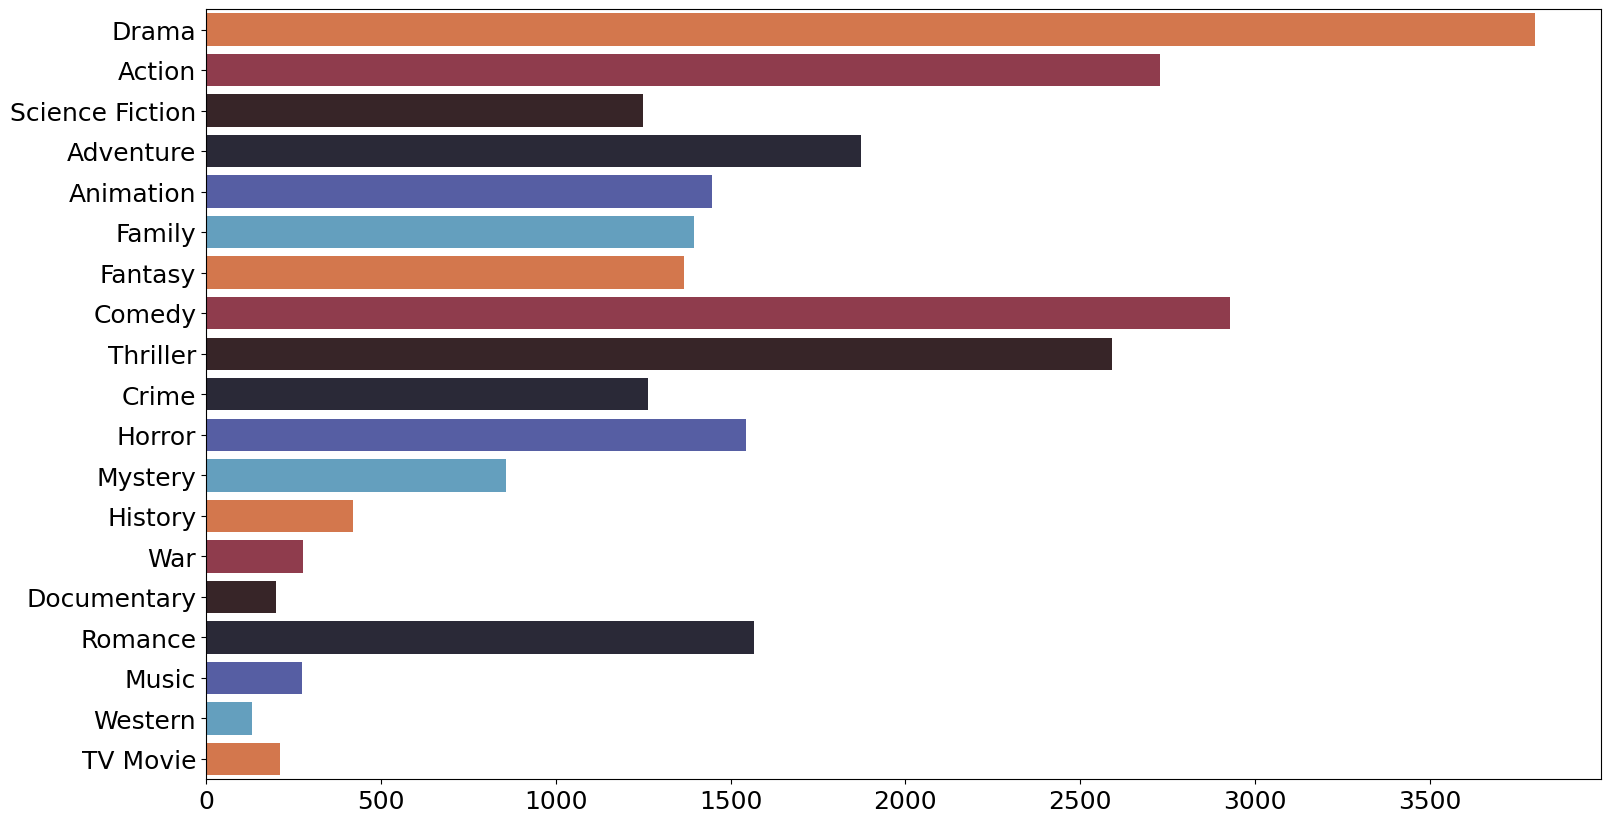

In [85]:
Figura = sns.color_palette('icefire') #Apenas selecionado as cores do gráfico
Figura.reverse() #Apenas invertendo a sequência de cores

ax = sns.barplot(x=vals, y=keys, palette = Figura)
plt.rcParams['figure.figsize'] = (18, 10) #Aumentar o tamanho da Figura
plt.rcParams.update({"font.size": 18}) #Aumentar a letra
plt.savefig('Linha_x_avaliacao.png', dpi=300)

In [92]:
media_por_genero = df.groupby(generos in df['genero'])['score'].mean()

media_por_genero

TypeError: ignored